<b><center>Homework 2  
Due 11:59pm EST Wednesday Sept 28<center></b>

<b>Problem 1 [20 points].  Deflategate</b>

In a controversy that has divided the American football world, the local New England Patriots team's footballs were measured at the 12.5 psi range of the allowed 12.5 to 13.6 legal range before the game.  Ball measurements by two officials at halftime of the AFC Championship game in 2015 (http://www.businessinsider.com/psi-new-england-patriots-deflategate-footballs-2015-5) were:
11.50, 10.85, 11.15, 10.70, 11.10, 11.60, 11.85, 11.10, 10.95, 10.50,and 10.90 psi by one official, and
11.80, 11.20, 11.50, 11.00, 11.45, 11.96, 12.30, 11.55, 11.35, 10.90, and 11.35 psi by the other official.

You can assume the data is normally distributed for this problem and alpha = 0.05.


In [1]:
import scipy.stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
import math
from sklearn import datasets, linear_model
%matplotlib inline

/home/joshi/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<b>Problem 1A</b>.  Are the balls measured by either official significantly lower than the allowed limit?


In [2]:
A = [11.50, 10.85, 11.15, 10.70, 11.10, 11.60, 11.85, 11.10, 10.95, 10.50, 10.90]
B = [11.80, 11.20, 11.50, 11.00, 11.45, 11.96, 12.30, 11.55, 11.35, 10.90, 11.35]

print (st.ttest_1samp(A, 12.5))
print (st.ttest_1samp(B, 12.5))

Ttest_1sampResult(statistic=-11.464614896369884, pvalue=4.4821240155345132e-07)
Ttest_1sampResult(statistic=-8.1708804998536042, pvalue=9.7803429041811727e-06)


When compared the average measurement of 12.5 psi, the null hypothesis that the average mesaurement is equal to the mean of the two datasets of air pressure measurement is false. This is because the p-value calculated is less than 0.05, thus it can be concluded that the balls measured by both officials is significantly lower than the allowable limit. 

<b>Problem 1B</b>.  Are the two officials’ measurements statistically equivalent?  Assume that the two officials measured two sets of balls without any relationship between individual balls and use a t-test.

In [3]:
print (st.ttest_ind(A, B))

Ttest_indResult(statistic=-2.1804923648408545, pvalue=0.04133675064704697)


The t-test run above yeilds a p-value less than 0.05, thus we have to reject the null hypothesis that the two sets of measurements are statiscally equivalent. 

<b>Problem 1C</b>.  Although we did not discuss this in lecture, when two sets of measurements are made on the same or similar enities, a paired t-test is often used.  These are frequently used for before/after tests, twin studies, and inter-rater tests.  Compute a paired test between the two officials assuming the balls are in the same order.  A good reference for these tests is http://www.statstutor.ac.uk/resources/uploaded/paired-t-test.pdf.

In [4]:
print (st.ttest_rel(A,B))

Ttest_relResult(statistic=-22.396687125619689, pvalue=7.0789047692540977e-10)


When a paried t-test is run, the p-value yeilded is less than 0.05 thus showing that the two sets of mesaurements are not correlated. 

<b>Problem 1D.</b>  When comparing two different tests, statisticians tend to compare them by determining which is more powerful.  Which one (paired or unpaired) is moe powerful (i.e. can establish significance with fewer samples)?  

A paired t-test is more powerful than an unpaired t-test for a few reasons. For one, the paired t-test does not need to satisfy the equal variance assumption as the unpaired t-test. This is great advantage in comparing two datasets as that cannot always be seen in real life. A paired t-test is also more powerful, because two data sets can be similar with similar sources of noise, thus can be treated as pairs rather than completely independent samples.

<b>Problem 1E.</b>  A study reported in https://www.sciencenews.org/blog/culture-beaker/deflategate-favored-foul-play-over-science suggests that the difference in temperature alone (ignoring the 250 pound super-athletes jumping on the balls) resulted in an average of 1.07 psi decrease.  Compare the average psi for each official’s measurements against the modified threshold (12.5-1.07).  What can you conclude?

In [5]:
A = [11.50, 10.85, 11.15, 10.70, 11.10, 11.60, 11.85, 11.10, 10.95, 10.50, 10.90]
B = [11.80, 11.20, 11.50, 11.00, 11.45, 11.96, 12.30, 11.55, 11.35, 10.90, 11.35]

print (st.ttest_1samp(A, 12.5-1.07))
print (st.ttest_1samp(B, 12.5-1.07))

Ttest_1sampResult(statistic=-2.6451039597506947, pvalue=0.024518237815870203)
Ttest_1sampResult(statistic=0.46208749684988465, pvalue=0.65390836011400633)


From the result above, it seems that the measurements are giving contradicting answers. The first set of measurements is not within the allowable limit as the p-value is less than 0.05, so the null hypothesis must be rejected. But, the second set of measurements is within the allowable limit as the p-value is larger than 0.05, so the null hypothesis can be accepted. This means that the second set of measurements is significantly lower than the first. 

<b>Problem 1F.</b>  The previous study focused on dry balls that are not realistic given the field conditions.  Wetting the balls reduced the psi by an additional 0.75 psi.   Compare the average psi for each official’s measurements against the wet-modified threshold.  What can you conclude?


In [6]:
A = [11.50, 10.85, 11.15, 10.70, 11.10, 11.60, 11.85, 11.10, 10.95, 10.50, 10.90]
B = [11.80, 11.20, 11.50, 11.00, 11.45, 11.96, 12.30, 11.55, 11.35, 10.90, 11.35]

print (st.ttest_1samp(A, 12.5-1.07-0.75))
print (st.ttest_1samp(B, 12.5-1.07-0.75))

Ttest_1sampResult(statistic=3.5367962294683615, pvalue=0.0053854371234765969)
Ttest_1sampResult(statistic=6.5132332889317679, pvalue=6.7807642244908578e-05)


From the result above, it seems that the measurements are giving answers that are in line with each other. Both sets of measurements are not equivalent to the allowable threshold as the p-value is less than 0.05 for both, so the null hypothesis must be rejected. This means that the measurements were statistically higher than the official limit set. 

<b>Problem 2  [15 points]  Regression of one variable</b>

The frequently cited “Moore’s Law” originated with a 1965 article in Electronics magazine that said that the number of transistors in a given area would double every year.   

<b>Problem 2a</b> Using the mooresLawHw.txt file, compute the relationship between the number of transistors as a function of time.  Note that you may need to perform a transform of the data to more easily model the data.  Include the fit, diagnostics and your interpretation of these.

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


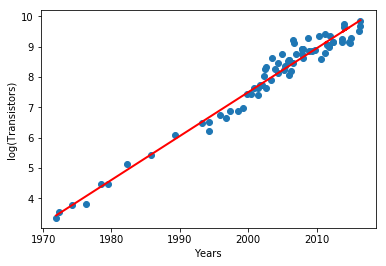

In [7]:
data = pd.read_csv("mooresLawHw.txt",header=0,sep='\t')
data = data.dropna(axis=1, how = 'any')

X = data['Year']
X = X.reshape((len(X), 1))
Y = data['Transistors']
Y = Y.reshape((len(Y), 1))
Y10 = np.log10(Y)

X_fit = sm.add_constant(X, has_constant='add')
mod = sm.OLS(Y10, X_fit)
results = mod.fit()
W_e = results.params

fle = lambda x: W_e[0] + W_e[1]*x

Yf = np.apply_along_axis(fle, 1, X)

plt.scatter(X, Y10)
plt.plot(X, Yf, 'r', linewidth=2.0)
plt.xlabel('Years')
plt.ylabel('log(Transistors)')

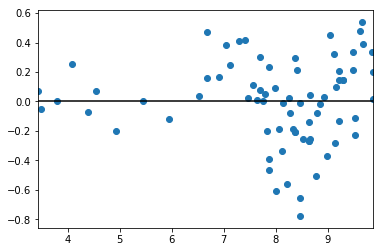

In [8]:
res = Yf - Y10
plt.scatter(x=Yf,y=res)
plt.xlim(np.min(Yf),np.max(Yf))
plt.hlines(xmin=np.min(Yf),xmax=np.max(Yf),y=0)

(array([  2.,   2.,   3.,   7.,  10.,  12.,  14.,  11.,   8.,   5.]),
 array([-0.78079808, -0.64855079, -0.51630351, -0.38405623, -0.25180894,
        -0.11956166,  0.01268562,  0.14493291,  0.27718019,  0.40942747,
         0.54167476]),
 <a list of 10 Patch objects>)

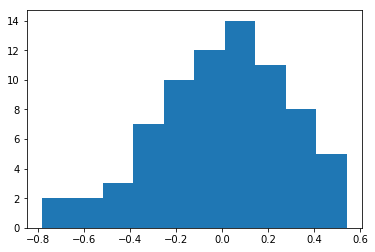

In [9]:
plt.hist(res)

In [10]:
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     2148.
Date:                Tue, 08 Aug 2017   Prob (F-statistic):           2.35e-55
Time:                        22:05:48   Log-Likelihood:                -11.801
No. Observations:                  74   AIC:                             27.60
Df Residuals:                      72   BIC:                             32.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -281.8707      6.253    -45.080      0.0

The response variable which is the number of Transistors was transformed using a logartihmic transformation to make regression easier. From the first plot it can be noted that our fit (red line) is pretty good as it follows the trend of the increasing number of transistors as time goes by. 

Thus we can conclude that there a strong positive relation between time and the number of transistors, concluding that Moore's Law might be true. But looking at this plot alone is not a good representative of the fit. 

In the next plot, the residuals are plotted and we can observe that they are fairly evenly distributed along the x-axis. This helps prove the assumption of independence as the residuals are randomly dispered along the axis. 

The next plot creates a histogram of the residuals and the result is a fairly normal histogram. This helps meet the normality of residuals assumption. 

From the summary of the fit, we can conclude that the predictors and constant are signficant as their p-value is less than 0.05. And the Adjusted R-squares value is pretty high with 0.967. 

Because of the reasons above, we can conclude that this fit of data is accurate. 

<b>Problem 2b</b> Write the equation that relates the number of transistors to time.

In [11]:
fle = lambda x: -2.81870732e+02 + (1.44685270e-01)*x

<b>Problem 2c</b> Compute the predicted number of transistors in the year 2026 when AI fans claim that processing power will rival that of a human brain.

In [12]:
10**(fle(x = 2026))

182652247294.34564

<b>Problem 2d</b> Many have claimed that Moore’s Law cannot continue but is actually plateauing due to physical reasons.  A model that would capture such an effect could be achieved by adding a higher order power to the model (like a polynomial term).  Compare the significance of the terms, model diagnostics, and/or model comparison statistics to assert whether the 2a model or the 2d model is better.

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


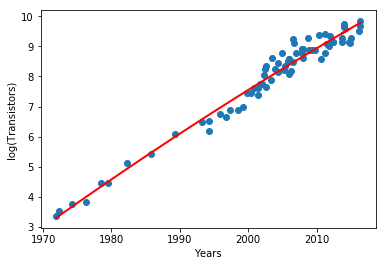

In [13]:
data = pd.read_csv("mooresLawHw.txt",header=0,sep='\t')
data = data.dropna(axis=1, how = 'any')

X = data['Year']
X = X.reshape((len(X), 1))
Y = data['Transistors']
Y = Y.reshape((len(Y), 1))
Y10 = np.log10(Y)

Z=np.reshape(X[:,0]**2,(X.shape[0],1), order='C')
X2=np.hstack((X,Z))
X_fit = sm.add_constant(X2, has_constant='add')

mod = sm.OLS(Y10, X_fit)
results = mod.fit()
W_e = results.params

fle = lambda x: W_e[0]*x[0] + W_e[1]*x[1] + W_e[2]*x[2]
fle_num = lambda x: -1.63065226e+03 + (1.49645595e+00)*x + (-3.38677139e-04)*(x**2)
#print 10**(fle_num(2026))

Yf = np.apply_along_axis(fle, 1, X_fit)
Yf = Yf.reshape((len(Yf), 1))

plt.scatter(X, Y10)
plt.plot(X, Yf, 'r', linewidth=2.0)
plt.xlabel('Years')
plt.ylabel('log(Transistors)')

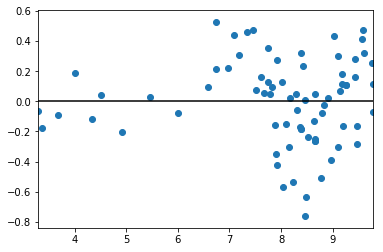

In [14]:
res = Yf - Y10
plt.scatter(x=Yf,y=res)
plt.xlim(np.min(Yf),np.max(Yf))
plt.hlines(xmin=np.min(Yf),xmax=np.max(Yf),y=0)

(array([  2.,   3.,   2.,   7.,  11.,   9.,  18.,   8.,   7.,   7.]),
 array([-0.76365984, -0.63449337, -0.50532691, -0.37616044, -0.24699397,
        -0.11782751,  0.01133896,  0.14050543,  0.26967189,  0.39883836,
         0.52800483]),
 <a list of 10 Patch objects>)

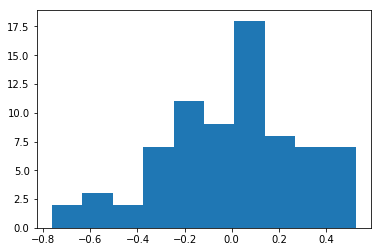

In [15]:
plt.hist(res)

In [16]:
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     1091.
Date:                Tue, 08 Aug 2017   Prob (F-statistic):           4.90e-54
Time:                        22:05:49   Log-Likelihood:                -10.731
No. Observations:                  74   AIC:                             27.46
Df Residuals:                      71   BIC:                             34.37
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1630.6523    934.530     -1.745      0.0

The response variable which is the number of Transistors was transformed using a logartihmic transformation to make regression easier. From the first plot it can be noted that our fit, (red line) is pretty good as it follows the trend of the increasing number of transistors as time goes by. But, the fit isn't that much different than that of 2a.

In the next plot, the residuals are plotted and we can observe that they are fairly evenly distributed along the x-axis. This helps prove the assumption of independence as the residuals are randomly dispered along the axis. 

The next plot creates a histogram of the residuals and the result is a fairly normal histogram. This helps meet the normality of residuals assumption. 

From the summary of the fit, we can conclude that the predictors and constant are not signficant as their p-value are greater than 0.05. And the Adjusted R-squares value is the same as that of 2a. 

Since, none of the predictors are significant, we can conclude that the fit of 2a is more accurate than 2d. 

<b>Problem 3 [25 points].  Climate Change</b>

Scientists and politicians are often at odds on the topic of whether global warming is real and debate the various causes.   This problem uses globalWarm2.txt data.


<b>Problem 3a</b> Fit an equation to the temperature as a function of year.  Based on your results, Is the temperature increasing as a function of year based on the last 3+ decades?

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:15: FutureWarning: reshape is de

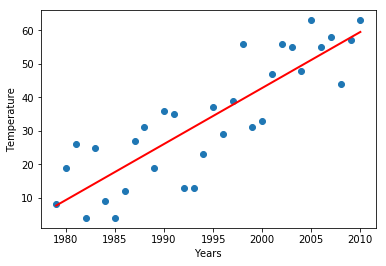

In [17]:
data = pd.read_csv("globalWarm2.txt",header=0,sep='\t')
data = data.dropna(axis=1, how = 'any')

Year = data['Year']
Year = Year.reshape((len(Year), 1))
Temp = data['Temp']
Temp = Temp.reshape((len(Temp), 1))
CO2 = data['CO2']
CO2 = CO2.reshape((len(CO2), 1))
Solar = data['Solar']
Solar = Solar.reshape((len(Solar), 1))
Transmission = data['Transmission']
Transmission = Transmission.reshape((len(Transmission), 1))
IceShelf = data['IceShelf']
IceShelf = IceShelf.reshape((len(IceShelf), 1))

X_fit = sm.add_constant(Year, has_constant='add')
mod = sm.OLS(Temp, X_fit)
res = mod.fit()
W_e = res.params

fle = lambda x: W_e[0] + W_e[1]*x

Yf = np.apply_along_axis(fle, 1, Year)

plt.scatter(Year, Temp)
plt.plot(Year, Yf, 'r', linewidth=2.0)
plt.xlabel('Years')
plt.ylabel('Temperature')

Based on the results above, the temperature is increasing as a function of year, there is a strong position correlation between the two variables. 

<b>Problem 3b</b> Plot a scatter plot of the following variables (preferably in a lattice):  Temp, CO<sub>2</sub>, Solar, Transmission, and IceShelf.  The variables represent the following:
<ul>
<li/>Temp = annual surface temperature measured in 1/100<sup>o</sup> C   over the 1950-1980 mean.  
<li/>Solar = annual mean intensity of sunlight piercing the atmosphere
<li/>CO2 = annual average fraction CO<sub>2</sub> in atmosphere (#molecules/#molecules of dry air) 
<li/>IceShelf = sea ice in 1MM square miles  hypothesized to reflect heat
<li/>Transmission = volcanic MLO transmission data where eruptions release greenhouse gases but also decrease the temperature
</ul>

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  from ipykernel import kernelapp as app


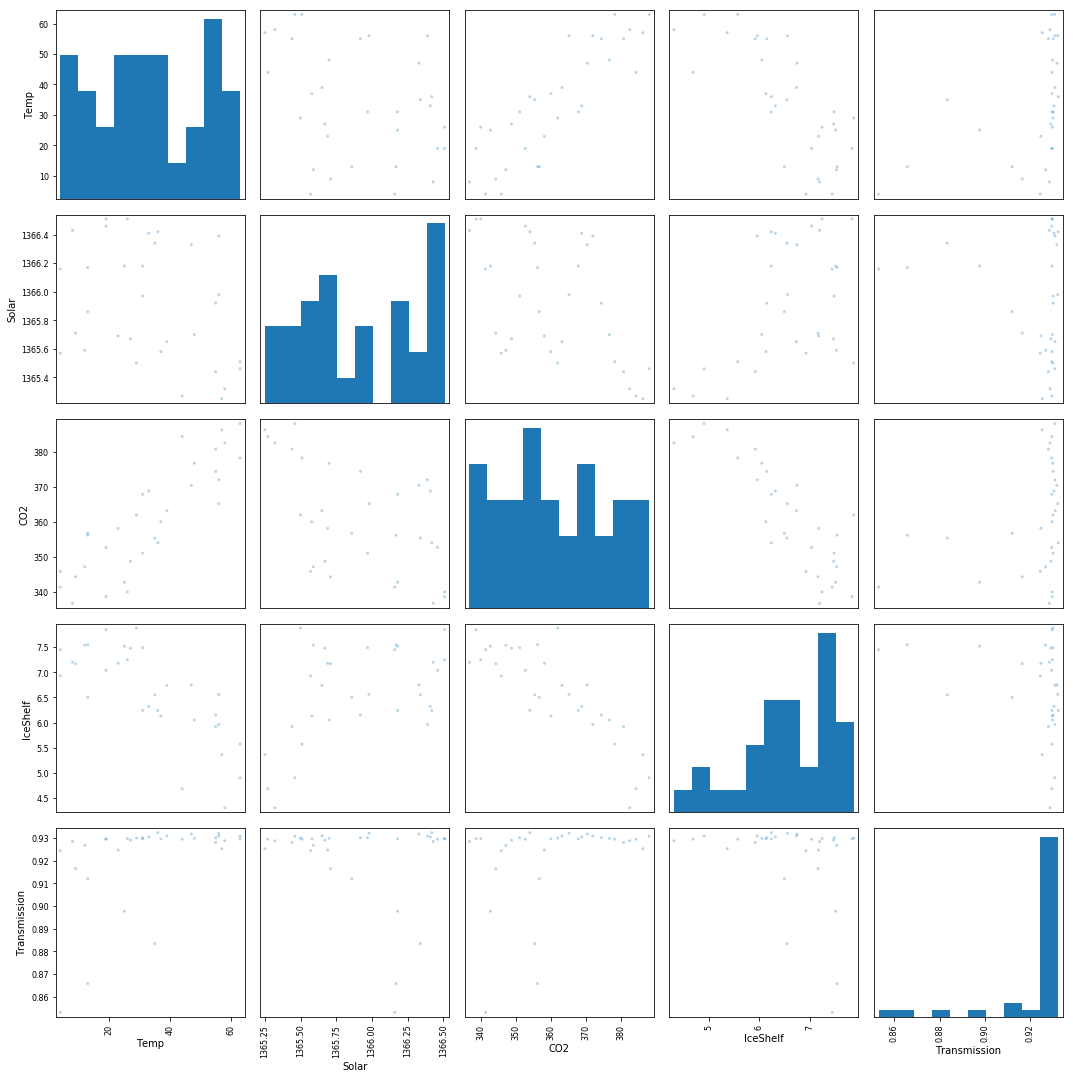

In [18]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data[['Temp', 'Solar', 'CO2', 'IceShelf', 'Transmission']], alpha=0.3, figsize=(15, 15), diagonal='hist');
plt.tight_layout()
plt.show()

<b>Problem 3c</b> Compute a multiple linear regression model of log(Temp) against the other variables.  Note that since there are limited number of annual measurements, you cannot run all combinations of variables.  In fact, you can only do complete pairwise interactions.  Be sure to remove the non-significant variables while still maintaining the hierarchy principle in your final model.   Interpret the results.

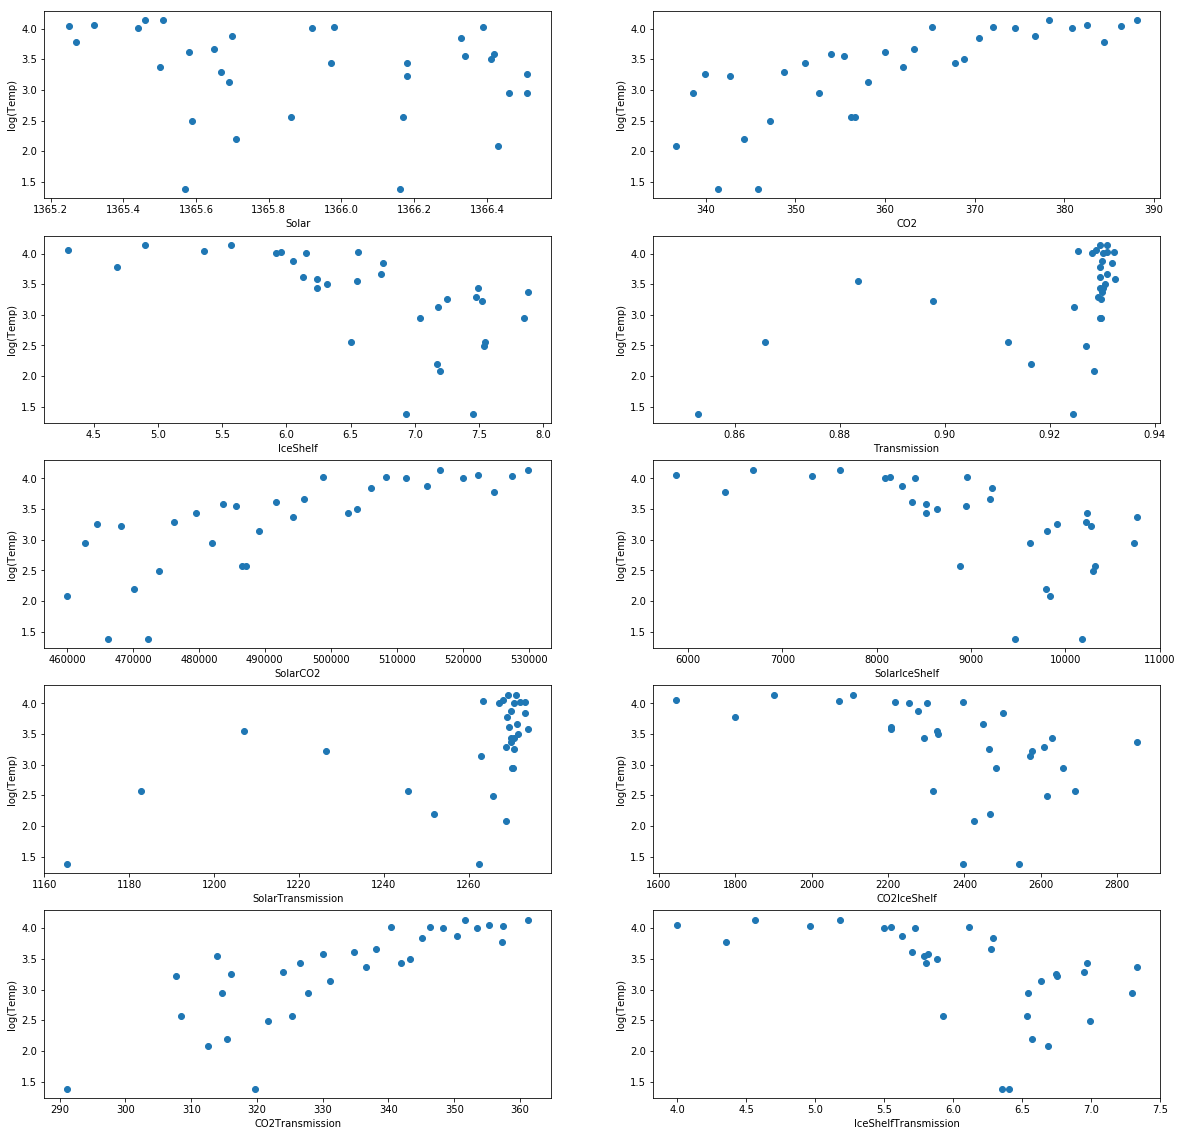

In [19]:
logTemp = np.log(Temp)
SolarCO2 = Solar*CO2
SolarIceShelf = Solar*IceShelf
SolarTransmission = Solar*Transmission
CO2IceShelf = CO2*IceShelf
CO2Transmission = CO2*Transmission
IceShelfTransmission = IceShelf*Transmission
data_int = np.column_stack((logTemp, Solar, CO2, IceShelf, Transmission, SolarCO2, SolarIceShelf, SolarTransmission, CO2IceShelf, CO2Transmission, IceShelfTransmission))
columns = ['logTemp', 'Solar', 'CO2', 'IceShelf', 'Transmission', 'SolarCO2', 'SolarIceShelf', 'SolarTransmission', 'CO2IceShelf', 'CO2Transmission', 'IceShelfTransmission']
variables = ['Solar', 'CO2', 'IceShelf', 'Transmission', 'SolarCO2', 'SolarIceShelf', 'SolarTransmission', 'CO2IceShelf', 'CO2Transmission', 'IceShelfTransmission']
index = range(0, len(logTemp))
df_int = pd.DataFrame(data_int, index, columns)

X = df_int[variables]
Y = df_int['logTemp']

fig, axs = plt.subplots(5,2, figsize=(20, 20), facecolor='w', edgecolor='k')
axs = axs.ravel()

for ii in range(0, len(variables)):
    
    Y = df_int['logTemp']
    X = df_int[variables[ii]]
    X_fit = sm.add_constant(X, has_constant='add')
    mod = sm.OLS(Y, X_fit)
    results = mod.fit()
    axs[ii].scatter(X, Y)
    axs[ii].set_xlabel(variables[ii])
    axs[ii].set_ylabel('log(Temp)')

Examining the scatter plots above, there seems to be strong correlation with log(Temp) with the following interactive variables - IceShelfTransmission, CO2Transmission, CO2IceShelf, SolarIceShelf, SolarCO2. Because of the hierarchy principle, we must include Solar, CO2, IceShelf, Transmission as well. These might be too many variables, so below I have implemented a Recursive Feature Selection that should hopefully yeild the best results. 

In [20]:
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import RFE  #Recursive(Backward) feature selection, takes all features and prunes out recursively.

X = df_int[variables]
Y = df_int['logTemp']
lm = LinearRegression()
lmfit = lm.fit(X, Y)

aic = [0]*(len(variables))

#This for loops finds the combination of variables with the lowest AIC. 
for ii in range(1, len(variables)):
    rfe = RFE(estimator=lm, n_features_to_select= ii, step=1)
    rfe.fit(X, Y)
    best_features = np.where(rfe.get_support())[0]
    best = [variables[i] for i in best_features]

    X_fit = sm.add_constant(df_int[best], has_constant='add')
    mod = sm.OLS(Y, X_fit)
    results = mod.fit()
    
    aic[ii] = results.aic    

aic = aic[1:]
n_features = aic.index(min(aic)) + 1

rfe = RFE(estimator=lm, n_features_to_select= n_features, step=1)
rfe.fit(X, Y)
best_features = np.where(rfe.get_support())[0]
best = [variables[i] for i in best_features]

X_fit = sm.add_constant(df_int[best], has_constant='add')
mod = sm.OLS(Y, X_fit)
results = mod.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                logTemp   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     16.65
Date:                Tue, 08 Aug 2017   Prob (F-statistic):           1.20e-07
Time:                        22:05:54   Log-Likelihood:                -10.450
No. Observations:                  32   AIC:                             34.90
Df Residuals:                      25   BIC:                             45.16
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.326e+05 

<b> Problem 3d</b>	Run the diagnostics and interpret whether the model in c) works.

In [21]:
W_e = results.params

fle = lambda x: W_e[0] + W_e[1]*x[0] + W_e[2]*x[1] + W_e[3]*x[2] + W_e[4]*x[3] + W_e[5]*x[4] + W_e[6]*x[5]

Yf = np.apply_along_axis(fle, 1, df_int[best])


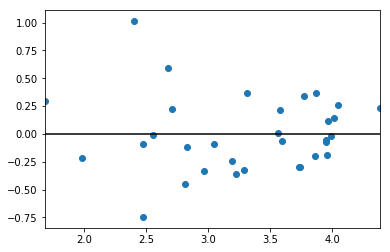

In [22]:
res = Yf - Y
plt.scatter(x=Yf,y=res)
plt.xlim(np.min(Yf),np.max(Yf))
plt.hlines(xmin=np.min(Yf),xmax=np.max(Yf),y=0)

(array([ 1.,  1.,  6.,  9.,  4.,  6.,  3.,  1.,  0.,  1.]),
 array([-0.74440659, -0.56884415, -0.3932817 , -0.21771926, -0.04215682,
         0.13340563,  0.30896807,  0.48453051,  0.66009295,  0.8356554 ,
         1.01121784]),
 <a list of 10 Patch objects>)

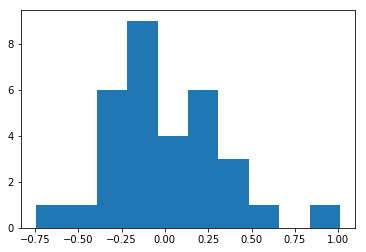

In [23]:
plt.hist(res)

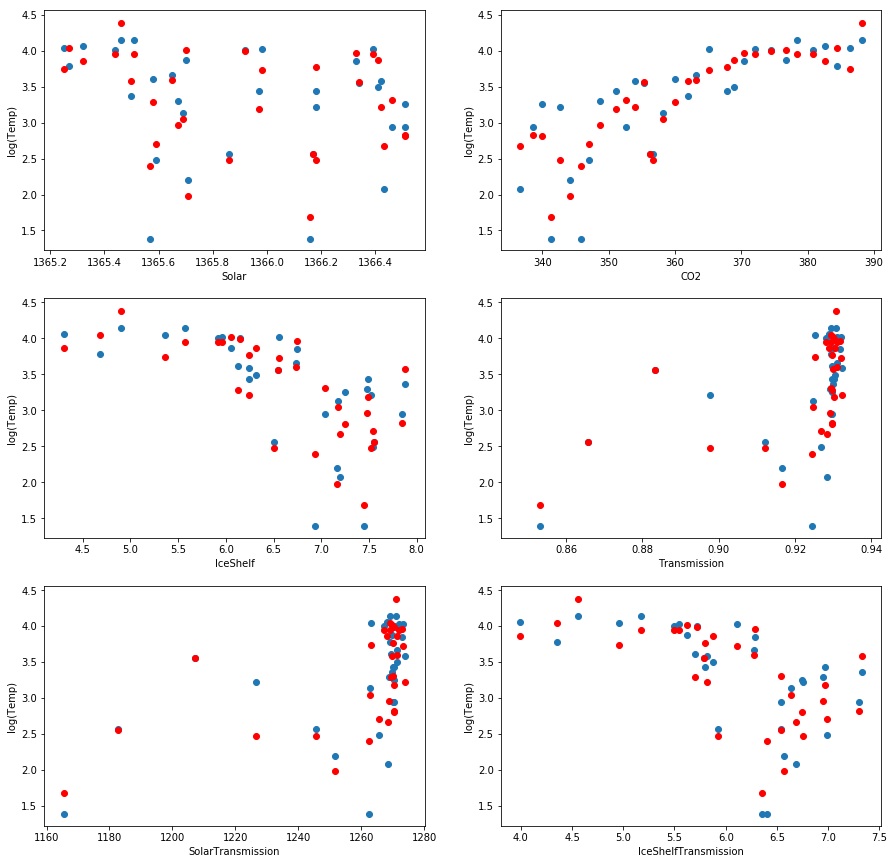

In [24]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(15, 15), facecolor='w', edgecolor='k')

ax1.scatter(df_int[best[0]], Y)
ax1.scatter(df_int[best[0]], Yf, color = 'red')
ax1.set_xlabel('Solar')
ax1.set_ylabel('log(Temp)')

ax2.scatter(df_int[best[1]], Y)
ax2.scatter(df_int[best[1]], Yf, color = 'red')
ax2.set_xlabel('CO2')
ax2.set_ylabel('log(Temp)')

ax3.scatter(df_int[best[2]], Y)
ax3.scatter(df_int[best[2]], Yf, color = 'red')
ax3.set_xlabel('IceShelf')
ax3.set_ylabel('log(Temp)')

ax4.scatter(df_int[best[3]], Y)
ax4.scatter(df_int[best[3]], Yf, color = 'red')
ax4.set_xlabel('Transmission')
ax4.set_ylabel('log(Temp)')

ax5.scatter(df_int[best[4]], Y)
ax5.scatter(df_int[best[4]], Yf, color = 'red')
ax5.set_xlabel('SolarTransmission')
ax5.set_ylabel('log(Temp)')

ax6.scatter(df_int[best[5]], Y)
ax6.scatter(df_int[best[5]], Yf, color = 'red')
ax6.set_xlabel('IceShelfTransmission')
ax6.set_ylabel('log(Temp)')

The approach above uses the Recursive Feature Selection for a different number of features selected and the best model is one with the lowest AIC. In this case, the best model is that with 6 features as described above in the Fit summary. The model also satsfies the assumptions of linear regression, with the residuals of the errors randomly distributed around the x-axis and the residuals are also normally distributed as can be seen in the histogram. 

What is best is seeing the fitted values against each predicted variable, and it can be clearly seen that this is an almost perfect fit. 

What is troubling in this fit is that IceShelf and IceShelfTransmission are not signficant predictors according to the summary. I'm not sure why that is the case. 

<b>Problem 4. [15 points]  Gradient Descent </b>

The function that we are trying to minimize using a gradient descent is:

f(x,y) = 100x&#10033;exp(-0.5x&#10033;x+0.5&#10033;x-0.5y&#10033;y-y+pi)

The gradient of f = grad f(x) = [dx dy] where

dx = 100exp(-0.5x&#10033;x+0.5x-0.5y&#10033;y-y+pi)*(1 + x(-x + 0.5))

dy = 100x&#10033;exp(-0.5x&#10033;x+0.5x-0.5y&#10033;y-y+pi)(-y - 1)




<b>Problem 4a</b>  Starting at point (x=0, y=5), perform a gradient descent to find the minimum value.  You will have to choose an appropriate step value.  Print out the iteration, sequence of locations, and step size. 
Comment on the descent path as to whether it is efficient or how it could be improved.

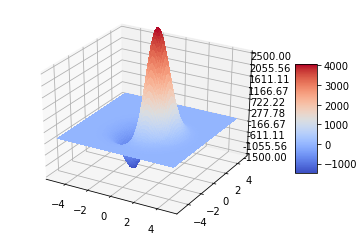

In [25]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
# import matplotlib.pyplot as plt
import numpy as np

def plotcostFunc():    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X = np.arange(-5, 5, 0.10)
    Y = np.arange(-5, 5, 0.10)
    X, Y = np.meshgrid(X, Y)
    # R = np.sqrt(X**2 + Y**2)
    
    # costfunc 
    fxy = 100 * X * np.exp(-0.5 * X**2 + 0.5 * X - 0.5 * Y**2 - Y + math.pi)
    # Z = np.sin(R)
    Z = fxy
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.set_zlim(-1.01, 1.01)
    ax.set_zlim(-1500, 2500)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
    return X,Y,Z

X,Y,costFunc = plotcostFunc()

As you can see, there is a positive peak and a negative peak that straddle x = 0.  Choosing the starting point (x=5,y=0) is a fairly flat region that will require a patient strategy.  The point (x=5, y=5) is hidden from the minimum value so the search will head the wrong direction.  You can appreciate the difficulty in working with 1000s of variables.

In [26]:
def costFunction(x,y):
    return 100 * x * math.exp(-0.5 * x*x + 0.5 * x - 0.5 * y*y - y + math.pi)

def findRoot(trial,x_new,y_new,precision,gamma):
    """
    x_new - inital x value
    y_new - initial y value    
    precision - evaluation size for numerical equivalency (when to exit loop)
    gamma = step size/learning rate
    """
    startX = x_new
    startY = y_new
    iteration = 0
    x_old = y_old = 0;
    precision = 0.000001
    dfdx = lambda x,y: 100*math.exp(-0.5*x*x+0.5*x-0.5*y*y-y+math.pi)*(1 + x*(-x + 0.5))
    dfdy = lambda x,y: 100*x*math.exp(-0.5*x*x+0.5*x-0.5*y*y-y+math.pi)*(-y - 1)

    #while abs(x_new - x_old) > precision:
    while (abs(y_new - y_old) > precision) and (abs(x_new - x_old) > precision):
        x_old = x_new
        y_old = y_new
        x_new += -gamma * dfdx(x_old,y_old)   
        y_new += -gamma * dfdy(x_old,y_old)
        #print(x_new,y_new)
        iteration += 1;
        #e = e + [sse(Wg,X,Y)]    
        # print('[{:10.7f}][{:10.7f}]'.format(x_new,y_new))
        # print out the iteration, sequence of locations, and step size.    
        # print('{} {:5.1f} {:5.1f} {:5.1f}'.format(iteration, gamma, x_new, y_new))
    
    # print('Local minimum occurs at', iteration, x_new, y_new) 
    print('\n',trial)    
    if iteration <= 1:
        print('No roots were found. Solution DID NOT converge')
    else:
        print('Solution DID converge')
    print('[ X = {:7.5f} ] [ Y = {:7.5f} ] [ F(x,y) = {:7.5f} ]'.format(x_new,y_new,costFunction(x_new,y_new)))    
    print('iterations={} stepSize={:7.5f} minX={:7.5f} minY={:7.5f} startX={:5.2f} startY={:5.2f}'.format(iteration, gamma, x_new, y_new, startX, startY))    

# ROOT = -0.8, -1.0
def rootFinderParameters():
    # parameters = [trial,x,y,precision,stepsize]
    paraMeters = [
        ['[Trial 0]',-2,2,0.000001,0.00001],
        ['[Trial 1]',0,5,0.000001,0.00001], # start AT [0,5]
        ['[Trial 2]',5,5,0.000001,0.0001],  # start AT [5,5]
        ['[Trial 3]',-1,-1,0.000001,0.0001],
        ['[Trial 4 - SMALL STEP SIZE (1x)]',-2,-2,0.000001,0.000001],
        ['[Trial 5 - LARGER STEP SIZE (10x)]',-2,-2,0.000001,0.00001],
        ['[Trial 6 - LARGEST STEP SIZE (100x)]',-2,-2,0.000001,0.0001]]    
    trialSet = pd.DataFrame(paraMeters)
    trialSet.columns=['Trial','x_new','y_new','precision','stepsize']
    return trialSet

def comments4a():
    print('\n\nNot all the tests converge.')
    print('in particular when [X,Y] = [0,5] does not converge')
    print('Gradient descent is a numerical root finder. Numerical solutions can suffer from')
    print('rate of convergence.') 
    print('There ae ways to improve the effectivness of a numerical root solver.')
    print('[1] Adjust step size')
    print('[2] Employ different step sizes for x,y,z...')
    print('[3] Employ series acceleration to improve the rate of convergence')
    
def driver4a():
    trialSet = rootFinderParameters()
    for index in range(len(trialSet)):
        trial = trialSet.loc[index,].Trial        
        x_new = trialSet.loc[index,].x_new
        y_new = trialSet.loc[index,].y_new
        precision = trialSet.loc[index].precision     
        stepsize = trialSet.loc[index,].stepsize
        findRoot(trial,x_new,y_new,precision,stepsize)
    comments4a()

driver4a()


 [Trial 0]
Solution DID converge
[ X = -0.78080 ] [ Y = -0.96156 ] [ F(x,y) = -1485.28696 ]
iterations=2562 stepSize=0.00001 minX=-0.78080 minY=-0.96156 startX=-2.00 startY= 2.00

 [Trial 1]
No roots were found. Solution DID NOT converge
[ X = 0.00000 ] [ Y = 5.00000 ] [ F(x,y) = 0.00000 ]
iterations=0 stepSize=0.00001 minX=0.00000 minY=5.00000 startX= 0.00 startY= 5.00

 [Trial 2]
No roots were found. Solution DID NOT converge
[ X = 5.00000 ] [ Y = 5.00000 ] [ F(x,y) = 0.00000 ]
iterations=1 stepSize=0.00010 minX=5.00000 minY=5.00000 startX= 5.00 startY= 5.00

 [Trial 3]
No roots were found. Solution DID NOT converge
[ X = -0.92982 ] [ Y = -1.00000 ] [ F(x,y) = -1446.35973 ]
iterations=1 stepSize=0.00010 minX=-0.92982 minY=-1.00000 startX=-1.00 startY=-1.00

 [Trial 4 - SMALL STEP SIZE (1x)]
Solution DID converge
[ X = -0.78103 ] [ Y = -1.03029 ] [ F(x,y) = -1485.70320 ]
iterations=3134 stepSize=0.00000 minX=-0.78103 minY=-1.03029 startX=-2.00 startY=-2.00

 [Trial 5 - LARGER STEP SI

<b>Problem 4b</b> What happens if you use a moderately large step size?

See trial 5 above in 4a.

<b>Problem 4c</b> Repeat 4a) using a starting location of (5, 5).  

See trial 2 above.  The roots generally will not converge but drift away from the center.

<b>Problem 5 [15 points] Bayes Rule Application</b>

Alzheimer’s Disease is a terrible affliction affecting 5.3 million of the 319 million people in this country and is the only top-10 cause of death in this country that cannot be prevented, cured, or slowed (www.alz.org/facts). Researchers have developed a new method for predicting Alzheimer’s, but like most medical tests, it is not perfect

If a patient has Alzheimer’s there is a 70% chance of a positive
prediction. If they don’t have Alzheimer’s the chance of a positive prediction is 25%. Compute the probability of actually having Alzheimer’s if the prediction is positive. Show your work using a few lines of python that print the relevant components and final result.


In [27]:
disease = 5.3*(10**6)
total = 319*(10**6)
no_disease = total - disease

p_positive_disease = 0.70
nu_people_positive_disease = disease*p_positive_disease

nu_people_negative_disease = disease - nu_people_positive_disease

p_positive_no_disease = 0.25
nu_people_positive_no_disease = no_disease*p_positive_no_disease
CC= no_disease - nu_people_positive_no_disease


probability_disease_positive = nu_people_positive_disease/(nu_people_positive_disease+nu_people_positive_no_disease)
print ("Probability of actually having the disease and testing positive is %.3f" % probability_disease_positive)

Probability of actually having the disease and testing positive is 0.045


<b>Problem 6 [10 points].  Information Gain</b>

Compute a decision tree to distinguish class A from class B for the following data set using information gain as the criteria and ignoring pruning.   Write a script to compute the information gain at the different split nodes and make appropriate decisions based on the data.  The solution can be specific to this problem rather than a general decision tree for any data.

<table>
<tr><th>FeatureX</th><th>FeatureY</th><th>FeatureZ</th><th>Class</th></tr>
<tr><td>Smart</td><td>Good</td><td>Hot</td><td>A</td></tr>
<tr><td>Smart</td><td>Ugly</td><td>Cold</td><td>A</td></tr>
<tr><td>Smart</td><td>Bad</td><td>Cold</td><td>B</td></tr>
<tr><td>Dumb</td><td>Bad</td><td>Hot</td><td>B</td></tr>
<tr><td>Smart</td><td>Good</td><td>Hot</td><td>A</td></tr>
<tr><td>Smart</td><td>Ugly</td><td>Hot</td><td>A</td></tr>
<tr><td>Dumb</td><td>Good</td><td>Hot</td><td>B</td></tr>
</table>


In [28]:
import math

def entropy(numA, numB):
    total = numA + numB
    if total == 0: # avoid /0 error
        return 0
    fractionA = numA/total
    fractionB = numB/total
    term1 = term2 = 0
    if fractionA > 0: # avoid log(0)
        term1 = -fractionA*math.log(fractionA,2)
    if fractionB > 0: # avoid log(0)
        term2 = - fractionB*math.log(fractionB,2)
    return  term1+term2
    
print('Root node')
numA = 4
numB = 3
totalEntropy = entropy(numA, numB)

#FeatureX: 5 smart 2 Dumb
#    5 smart: 4 A  1B
#    2 dumb:  0 A  2B -> no info
smart = entropy(4,1)
dumb  = entropy(0,2)
FeatureX = smart * (5/7) + dumb * (2/7)


#FeatureY: 3 good 2 ugly 2 bad
#    3 good: 2 A 1 B
#    2 ugly: 2 A 0 B -> no info
#    2 bad:  0 A 2 B -> no info
good = entropy(2,1)
ugly = entropy(2,0)
bad  = entropy(0,2) 
FeatureY = good * (3/7) + ugly * (2/7) + bad * (2/7)


#FeatureZ: 
#    5 Hot:    3A 2B
#    2 Cold:   1A 1B
hot  = entropy(3,2) 
cold = entropy(1,1) 
FeatureZ = hot * (5/7) + cold * (2/7)

GainX = totalEntropy - FeatureX
GainY = totalEntropy - FeatureY
GainZ = totalEntropy - FeatureZ
print("GainX",GainX,"\nGainY",GainY,"\nGainZ",GainZ)

print('Feature Y is the first node with the highest information gain:', GainY )

Root node
GainX 0.46956521111470706 
GainY 0.5916727785823276 
GainZ 0.005977711423774124
Feature Y is the first node with the highest information gain: 0.5916727785823276


After splitting on FeatureY, there is only one child to consider since the others have only one class.

<table>
<tr><th>FeatureX</th><th>FeatureY</th><th>FeatureZ</th><th>Class</th></tr>
<tr><td>Smart</td><td>Good</td><td>Hot</td><td>A</td></tr>
<tr><td>Smart</td><td>Good</td><td>Hot</td><td>A</td></tr>
<tr><td>Dumb</td><td>Good</td><td>Hot</td><td>B</td></tr>
</table>

In [29]:
print('Child node split on Y\n')
numA = 2
numB = 1
totalEntropy = entropy(numA, numB)

#FeatureX: 5 smart 2 Dumb
#    2 smart: 2 A  0 B
#    1 dumb:  0 A  1 B 
smart = entropy(2,0)
dumb  = entropy(0,1)
FeatureX = smart * (2/3) + dumb * (1/3)

#FeatureZ: 
#    3 Hot:    2 A 1 B
#    0 Cold:   0 A 0 B
hot  = entropy(2,1) 
cold = entropy(0,0) 
FeatureZ = hot * (3/3) + cold * (0/3)

GainX = totalEntropy - FeatureX
GainZ = totalEntropy - FeatureZ
print("GainX",GainX,"\nGainZ",GainZ)
print('\nFeature X is the child node with the highest information gain:', GainX )


Child node split on Y

GainX 0.9182958340544896 
GainZ 0.0

Feature X is the child node with the highest information gain: 0.9182958340544896


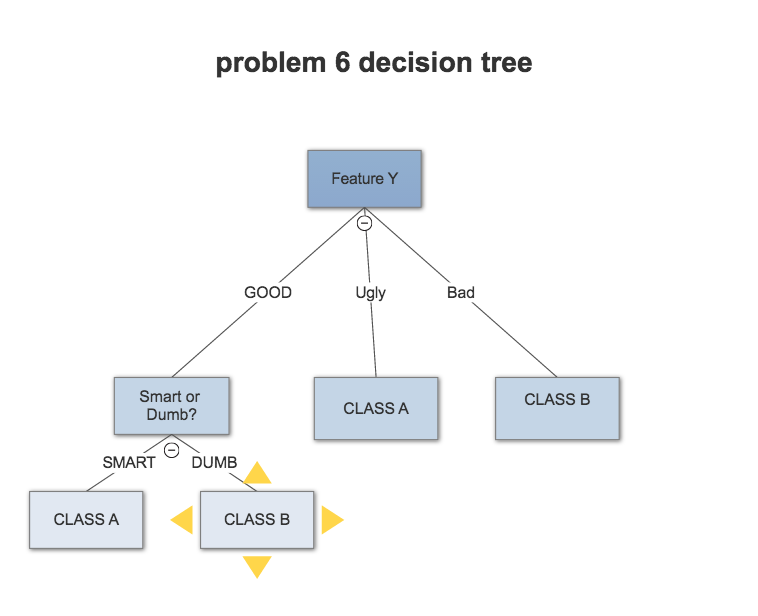

In [30]:
from IPython.display import Image
Image(filename='P6_desitiontree.png')

<b>Optional Exploratory Point Opportunity</b>

Write a decision tree using a standard splitting criteria of your choice and a pruning algorithm.  You can implement just the first half without any pruning for a partial point opportunity.  

This does not mean that you can find code on the web and modify it.  It means thinking through the steps and writing your own code.  Apply it to an interesting data set and show the results.
